In [130]:
# 시각화 스타일
!pip install mplcyberpunk

  Using cached mplcyberpunk-0.7.1-py3-none-any.whl (6.4 kB)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style 적용하기

import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
import yfinance as yf
from pandas_datareader import data as pdr


In [44]:
ss = yf.download("005930.KS", start="2022-01-01", end="2023-11-30")
naver = yf.download("035420.KS", start="2022-01-01", end="2023-11-30")
kakao = yf.download("035720.KS", start="2022-01-01", end="2023-11-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
print(ss.shape, naver.shape, kakao.shape)

(466, 6) (463, 6) (463, 6)


In [46]:
ss

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,75986.734375,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,74731.570312,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,74248.789062,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,75600.523438,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,75310.867188,9947422
...,...,...,...,...,...,...
2023-11-23,73000.0,73200.0,72200.0,72400.0,72400.000000,6775614
2023-11-24,72400.0,72600.0,71700.0,71700.0,71700.000000,6676685
2023-11-27,71500.0,72100.0,71100.0,71300.0,71300.000000,9113857


In [47]:
naver

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,376000.0,376000.0,365000.0,365500.0,363833.81250,803676
2022-01-05,362000.0,362000.0,352000.0,355000.0,353381.68750,1151703
2022-01-06,348500.0,349500.0,337500.0,338500.0,336956.90625,1280916
2022-01-07,338000.0,343500.0,337000.0,338000.0,336459.18750,787839
2022-01-10,339000.0,339500.0,329000.0,335000.0,333472.87500,828611
...,...,...,...,...,...,...
2023-11-23,206500.0,208000.0,204500.0,205500.0,205500.00000,345224
2023-11-24,205500.0,207500.0,204000.0,205500.0,205500.00000,335280
2023-11-27,205500.0,211000.0,205000.0,206000.0,206000.00000,538210


In [48]:
kakao

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,114838.320312,115342.000000,111816.257812,112319.937500,112196.054688,2378714
2022-01-05,111816.257812,111816.257812,105772.132812,106275.812500,106158.601562,5071136
2022-01-06,103253.750000,103757.429688,100634.632812,100735.367188,100624.265625,7068448
2022-01-07,100735.367188,102246.398438,100533.898438,100735.367188,100624.265625,3933744
2022-01-10,100735.367188,101239.046875,95900.070312,97310.367188,97203.039062,5338491
...,...,...,...,...,...,...
2023-11-23,50400.000000,50600.000000,49600.000000,50300.000000,50300.000000,1394573
2023-11-24,50400.000000,50900.000000,50000.000000,50500.000000,50500.000000,1011208
2023-11-27,50800.000000,51000.000000,49300.000000,49850.000000,49850.000000,1480318


In [49]:
df = pd.concat([
    kakao[['Adj Close', 'Volume']],
    naver[['Adj Close', 'Volume']],
    ss[['Adj Close', 'Volume']],
    ], axis=1)

df.columns = [
    'kakao_ad', 'kakao_v', 
    'naver_ad', 'naver_v', 
    'ss_ad', 'ss_v', 
    
]


In [50]:
df

,kakao_ad,kakao_v,naver_ad,naver_v,ss_ad,ss_v
Date,,,,,,
2022-01-04,112196.054688,2378714.0,363833.81250,803676.0,75986.734375,12427416
2022-01-05,106158.601562,5071136.0,353381.68750,1151703.0,74731.570312,25470640
2022-01-06,100624.265625,7068448.0,336956.90625,1280916.0,74248.789062,12931954
2022-01-07,100624.265625,3933744.0,336459.18750,787839.0,75600.523438,15163757
2022-01-10,97203.039062,5338491.0,333472.87500,828611.0,75310.867188,9947422
...,...,...,...,...,...,...
2023-11-23,50300.000000,1394573.0,205500.00000,345224.0,72400.000000,6775614
2023-11-24,50500.000000,1011208.0,205500.00000,335280.0,71700.000000,6676685
2023-11-27,49850.000000,1480318.0,206000.00000,538210.0,71300.000000,9113857


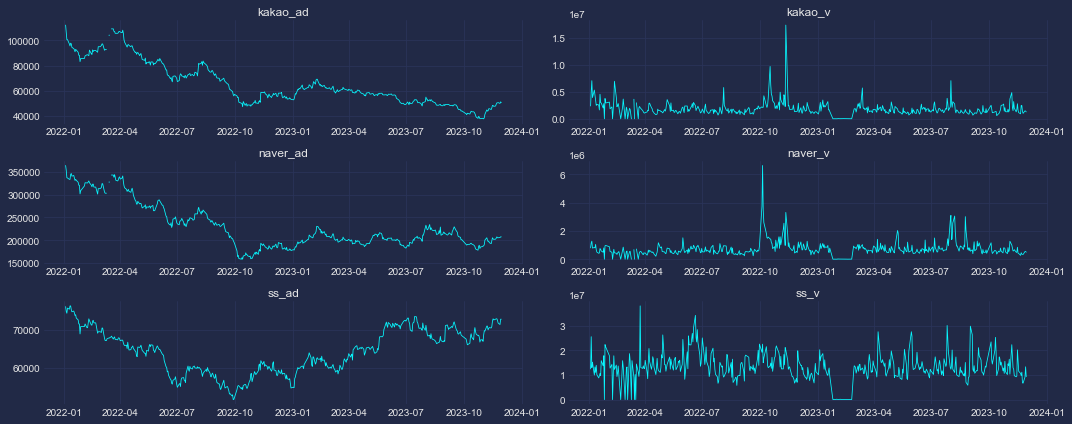

In [51]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,6))

ax_li = axes.flatten()
df_cols = df.columns
for i, (col, ax) in enumerate(zip(df_cols, ax_li)):
    ax.plot(df[col], linewidth=0.8)
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [52]:
# Granger 인과검정

In [53]:
# VAR 예측을 수행하기 전에 해당 변수들이 모두 상호연관성이 있는가를 확인 검증
# Granger 인과검정
# 귀무가설: X가 Y에 영향을 미치지 않는다


In [54]:
# 검정 값(p-value)을 판다스 데이터프레임으로 한번에 표시할 것이다.
# 이를 위해 값을 저장할 데이터프레임을 만들어주자. 값은 우선 0으로 채운다
# 출처: https://songseungwon.tistory.com/133 [관성을 이기는 데이터:티스토리]

In [55]:
df_pairs = pd.DataFrame(data=np.zeros((len(df_cols), len(df_cols))),
                        columns = ['X_'+x for x in df_cols],
                        index = ['Y_'+x for x in df_cols])
df_pairs


,X_kakao_ad,X_kakao_v,X_naver_ad,X_naver_v,X_ss_ad,X_ss_v
Y_kakao_ad,0.0,0.0,0.0,0.0,0.0,0.0
Y_kakao_v,0.0,0.0,0.0,0.0,0.0,0.0
Y_naver_ad,0.0,0.0,0.0,0.0,0.0,0.0
Y_naver_v,0.0,0.0,0.0,0.0,0.0,0.0
Y_ss_ad,0.0,0.0,0.0,0.0,0.0,0.0
Y_ss_v,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
 # granger 인과검정을 실시

In [57]:
from statsmodels.tsa.stattools import grangercausalitytests

df.dropna(inplace=True) # 결측치 제거

df['kakao_ad'].diff()
sample_outs = grangercausalitytests(df[['kakao_ad','kakao_v']], maxlag=4)
print(sample_outs)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4299  , p=0.5124  , df_denom=459, df_num=1
ssr based chi2 test:   chi2=0.4327  , p=0.5107  , df=1
likelihood ratio test: chi2=0.4325  , p=0.5108  , df=1
parameter F test:         F=0.4299  , p=0.5124  , df_denom=459, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1254  , p=0.8822  , df_denom=456, df_num=2
ssr based chi2 test:   chi2=0.2535  , p=0.8810  , df=2
likelihood ratio test: chi2=0.2534  , p=0.8810  , df=2
parameter F test:         F=0.1254  , p=0.8822  , df_denom=456, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3348  , p=0.8002  , df_denom=453, df_num=3
ssr based chi2 test:   chi2=1.0200  , p=0.7964  , df=3
likelihood ratio test: chi2=1.0189  , p=0.7967  , df=3
parameter F test:         F=0.3348  , p=0.8002  , df_denom=453, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2325  , p=0.9201  

In [58]:
# f테스트, 카이제곱 등의 여러 검정통계량 결과값
sample_outs[1][0]['ssr_chi2test']


(0.4326692260447896, 0.5106820979336959, 1)

In [59]:
[round(sample_outs[x][0]['ssr_chi2test'][1],2) for x in range(1,5)]
# p_value는 2번째 값, 0.82로 연관관계가 있다고 볼 수 없다. 즉, 영가설을 기각할 수 없다.

[0.51, 0.88, 0.8, 0.92]

In [60]:
maxlag = 14
for col_i, col in enumerate(df_cols):
    for idx_i, idx in enumerate(df_cols):
        outs = grangercausalitytests(df[[col,idx]], maxlag=maxlag)
        pval_min = np.min([round(outs[x][0]['ssr_chi2test'][1],2) for x in range(1, maxlag+1)])
        df_pairs.iloc[idx_i, col_i] = pval_min


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=460, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=47709.0026, p=0.0000  , df_denom=460, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=458, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=24047.6289, p=0.0000  , df_denom=458, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=456, df_num=3
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=16209.7087, p=0.0000  , df_denom=456, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0000  , p=1.

parameter F test:         F=1.0352  , p=0.4085  , df_denom=438, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.8632  , p=0.5583  , df_denom=435, df_num=9
ssr based chi2 test:   chi2=8.1085  , p=0.5232  , df=9
likelihood ratio test: chi2=8.0370  , p=0.5304  , df=9
parameter F test:         F=0.8632  , p=0.5583  , df_denom=435, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.7774  , p=0.6507  , df_denom=432, df_num=10
ssr based chi2 test:   chi2=8.1524  , p=0.6140  , df=10
likelihood ratio test: chi2=8.0799  , p=0.6210  , df=10
parameter F test:         F=0.7774  , p=0.6507  , df_denom=432, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=0.6902  , p=0.7483  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=7.9990  , p=0.7134  , df=11
likelihood ratio test: chi2=7.9290  , p=0.7196  , df=11
parameter F test:         F=0.6902  , p=0.7483  , df_denom=429, df_num=11

Granger Ca

ssr based chi2 test:   chi2=9.0608  , p=0.3372  , df=8
likelihood ratio test: chi2=8.9718  , p=0.3447  , df=8
parameter F test:         F=1.0903  , p=0.3686  , df_denom=438, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.0876  , p=0.3705  , df_denom=435, df_num=9
ssr based chi2 test:   chi2=10.2159 , p=0.3333  , df=9
likelihood ratio test: chi2=10.1027 , p=0.3422  , df=9
parameter F test:         F=1.0876  , p=0.3705  , df_denom=435, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.0040  , p=0.4391  , df_denom=432, df_num=10
ssr based chi2 test:   chi2=10.5278 , p=0.3955  , df=10
likelihood ratio test: chi2=10.4074 , p=0.4055  , df=10
parameter F test:         F=1.0040  , p=0.4391  , df_denom=432, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.3030  , p=0.2197  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=15.1020 , p=0.1779  , df=11
likelihood ratio test: chi2=14.

ssr based chi2 test:   chi2=16.3849 , p=0.1742  , df=12
likelihood ratio test: chi2=16.0943 , p=0.1870  , df=12
parameter F test:         F=1.2897  , p=0.2213  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.1710  , p=0.2981  , df_denom=423, df_num=13
ssr based chi2 test:   chi2=16.1948 , p=0.2388  , df=13
likelihood ratio test: chi2=15.9102 , p=0.2540  , df=13
parameter F test:         F=1.1710  , p=0.2981  , df_denom=423, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.1172  , p=0.3400  , df_denom=420, df_num=14
ssr based chi2 test:   chi2=16.7215 , p=0.2713  , df=14
likelihood ratio test: chi2=16.4176 , p=0.2885  , df=14
parameter F test:         F=1.1172  , p=0.3400  , df_denom=420, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2198  , p=0.0734  , df_denom=459, df_num=1
ssr based chi2 test:   chi2=3.2408  , p=0.0718  , df=1
likelihood ratio test: chi

likelihood ratio test: chi2=13.9845 , p=0.3017  , df=12
parameter F test:         F=1.1180  , p=0.3432  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.1379  , p=0.3247  , df_denom=423, df_num=13
ssr based chi2 test:   chi2=15.7364 , p=0.2637  , df=13
likelihood ratio test: chi2=15.4675 , p=0.2791  , df=13
parameter F test:         F=1.1379  , p=0.3247  , df_denom=423, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.0923  , p=0.3624  , df_denom=420, df_num=14
ssr based chi2 test:   chi2=16.3480 , p=0.2926  , df=14
likelihood ratio test: chi2=16.0575 , p=0.3099  , df=14
parameter F test:         F=1.0923  , p=0.3624  , df_denom=420, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7302  , p=0.0541  , df_denom=459, df_num=1
ssr based chi2 test:   chi2=3.7546  , p=0.0527  , df=1
likelihood ratio test: chi2=3.7394  , p=0.0531  , df=1
parameter F test:         F

ssr based chi2 test:   chi2=17.8416 , p=0.1636  , df=13
likelihood ratio test: chi2=17.4970 , p=0.1776  , df=13
parameter F test:         F=1.2901  , p=0.2153  , df_denom=423, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.2516  , p=0.2350  , df_denom=420, df_num=14
ssr based chi2 test:   chi2=18.7325 , p=0.1754  , df=14
likelihood ratio test: chi2=18.3523 , p=0.1912  , df=14
parameter F test:         F=1.2516  , p=0.2350  , df_denom=420, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4538  , p=0.5009  , df_denom=459, df_num=1
ssr based chi2 test:   chi2=0.4568  , p=0.4991  , df=1
likelihood ratio test: chi2=0.4565  , p=0.4992  , df=1
parameter F test:         F=0.4538  , p=0.5009  , df_denom=459, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1716  , p=0.8424  , df_denom=456, df_num=2
ssr based chi2 test:   chi2=0.3469  , p=0.8408  , df=2
likelihood ratio test: chi2=0.3

ssr based F test:         F=0.7045  , p=0.7345  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=8.1654  , p=0.6984  , df=11
likelihood ratio test: chi2=8.0925  , p=0.7050  , df=11
parameter F test:         F=0.7045  , p=0.7345  , df_denom=429, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=0.6538  , p=0.7956  , df_denom=426, df_num=12
ssr based chi2 test:   chi2=8.3065  , p=0.7607  , df=12
likelihood ratio test: chi2=8.2309  , p=0.7668  , df=12
parameter F test:         F=0.6538  , p=0.7956  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=0.7963  , p=0.6642  , df_denom=423, df_num=13
ssr based chi2 test:   chi2=11.0133 , p=0.6097  , df=13
likelihood ratio test: chi2=10.8807 , p=0.6208  , df=13
parameter F test:         F=0.7963  , p=0.6642  , df_denom=423, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.7279  , p=0.7466  , df_denom=420, df_num=14
ssr b

ssr based F test:         F=1.4850  , p=0.1339  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=17.2113 , p=0.1018  , df=11
likelihood ratio test: chi2=16.8917 , p=0.1111  , df=11
parameter F test:         F=1.4850  , p=0.1339  , df_denom=429, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.3615  , p=0.1814  , df_denom=426, df_num=12
ssr based chi2 test:   chi2=17.2966 , p=0.1388  , df=12
likelihood ratio test: chi2=16.9732 , p=0.1506  , df=12
parameter F test:         F=1.3615  , p=0.1814  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.3468  , p=0.1826  , df_denom=423, df_num=13
ssr based chi2 test:   chi2=18.6261 , p=0.1352  , df=13
likelihood ratio test: chi2=18.2510 , p=0.1482  , df=13
parameter F test:         F=1.3468  , p=0.1826  , df_denom=423, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.2786  , p=0.2170  , df_denom=420, df_num=14
ssr b

likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=11
parameter F test:         F=35.1440 , p=0.0000  , df_denom=440, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=438, df_num=12
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=12
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=12
parameter F test:         F=32.3170 , p=0.0000  , df_denom=438, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=436, df_num=13
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=13
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=13
parameter F test:         F=29.7495 , p=0.0000  , df_denom=436, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=434, df_num=14
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=14
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=14
parameter F test:      

parameter F test:         F=1.4313  , p=0.1636  , df_denom=432, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.5323  , p=0.1169  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=17.7587 , p=0.0874  , df=11
likelihood ratio test: chi2=17.4187 , p=0.0961  , df=11
parameter F test:         F=1.5323  , p=0.1169  , df_denom=429, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.3637  , p=0.1803  , df_denom=426, df_num=12
ssr based chi2 test:   chi2=17.3244 , p=0.1378  , df=12
likelihood ratio test: chi2=16.9999 , p=0.1496  , df=12
parameter F test:         F=1.3637  , p=0.1803  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.2460  , p=0.2437  , df_denom=423, df_num=13
ssr based chi2 test:   chi2=17.2316 , p=0.1889  , df=13
likelihood ratio test: chi2=16.9098 , p=0.2035  , df=13
parameter F test:         F=1.2460  , p=0.2437  , df_denom=423, df_num=13

Gran

likelihood ratio test: chi2=9.5301  , p=0.5731  , df=11
parameter F test:         F=0.8310  , p=0.6090  , df_denom=429, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.1124  , p=0.3478  , df_denom=426, df_num=12
ssr based chi2 test:   chi2=14.1318 , p=0.2924  , df=12
likelihood ratio test: chi2=13.9149 , p=0.3062  , df=12
parameter F test:         F=1.1124  , p=0.3478  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.0198  , p=0.4308  , df_denom=423, df_num=13
ssr based chi2 test:   chi2=14.1031 , p=0.3666  , df=13
likelihood ratio test: chi2=13.8866 , p=0.3819  , df=13
parameter F test:         F=1.0198  , p=0.4308  , df_denom=423, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.9820  , p=0.4708  , df_denom=420, df_num=14
ssr based chi2 test:   chi2=14.6973 , p=0.3992  , df=14
likelihood ratio test: chi2=14.4619 , p=0.4159  , df=14
parameter F test:      

ssr based F test:         F=0.9775  , p=0.4622  , df_denom=432, df_num=10
ssr based chi2 test:   chi2=10.2501 , p=0.4188  , df=10
likelihood ratio test: chi2=10.1358 , p=0.4287  , df=10
parameter F test:         F=0.9775  , p=0.4622  , df_denom=432, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=0.9355  , p=0.5058  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=10.8422 , p=0.4566  , df=11
likelihood ratio test: chi2=10.7142 , p=0.4675  , df=11
parameter F test:         F=0.9355  , p=0.5058  , df_denom=429, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=0.9023  , p=0.5447  , df_denom=426, df_num=12
ssr based chi2 test:   chi2=11.4627 , p=0.4897  , df=12
likelihood ratio test: chi2=11.3194 , p=0.5018  , df=12
parameter F test:         F=0.9023  , p=0.5447  , df_denom=426, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.1976  , p=0.2780  , df_denom=423, df_num=13
ssr b

likelihood ratio test: chi2=13.9923 , p=0.0820  , df=8
parameter F test:         F=1.7099  , p=0.0939  , df_denom=438, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.5289  , p=0.1351  , df_denom=435, df_num=9
ssr based chi2 test:   chi2=14.3610 , p=0.1101  , df=9
likelihood ratio test: chi2=14.1385 , p=0.1175  , df=9
parameter F test:         F=1.5289  , p=0.1351  , df_denom=435, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.3602  , p=0.1962  , df_denom=432, df_num=10
ssr based chi2 test:   chi2=14.2634 , p=0.1613  , df=10
likelihood ratio test: chi2=14.0435 , p=0.1710  , df=10
parameter F test:         F=1.3602  , p=0.1962  , df_denom=432, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.2577  , p=0.2467  , df_denom=429, df_num=11
ssr based chi2 test:   chi2=14.5764 , p=0.2027  , df=11
likelihood ratio test: chi2=14.3463 , p=0.2144  , df=11
parameter F test:         F=1.

In [61]:
df_pairs

,X_kakao_ad,X_kakao_v,X_naver_ad,X_naver_v,X_ss_ad,X_ss_v
Y_kakao_ad,1.00,0.09,0.16,0.00,0.01,0.22
Y_kakao_v,0.51,1.00,0.44,0.00,0.54,0.05
Y_naver_ad,0.20,0.08,1.00,0.00,0.00,0.01
Y_naver_v,0.11,0.00,0.27,1.00,0.29,0.52
Y_ss_ad,0.41,0.23,0.22,0.17,1.00,0.03
Y_ss_v,0.06,0.03,0.21,0.06,0.03,1.00


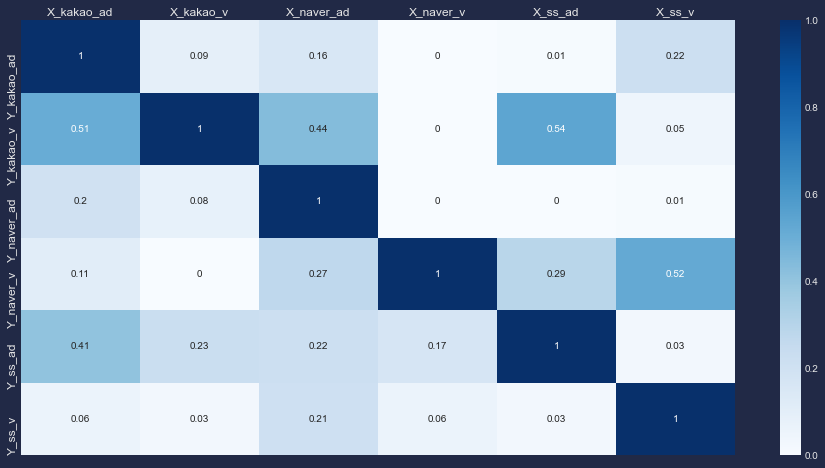

In [62]:
import seaborn as sns

plt.figure(figsize=(16,8))
ax = sns.heatmap(df_pairs, annot=True, cmap='Blues')
ax.xaxis.tick_top()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [63]:
# Step 4. Cointegration Test

In [64]:
# 공적분 검정(혹은 요한슨 검정)은 다중 시계열 간 적분상 균형관계가 존재하는가를 판단한다.
# 즉, Granger 검정이 단일 시계열보다 다중 시계열로 설명력을 더 얻을수 있는가? 를 확인해주었다면, 
# Cointegration 검정은 다중 시계열이 장기적 기간을 두고 안정적인 연관성을 보이는가? 를 확인해준다.
# 따라서 Granger 검정을 통해 필터링한 변수 조합 중 최적 조합을 찾기 위해 Cointegration 검정을 한번 더 실시하고자 한다.


In [65]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

sample_group = ['kakao_ad','kakao_v','naver_ad']
out = coint_johansen(df[sample_group], 1, 1)
out.lr1



array([111.01948208,  11.08664023,   4.10354817])

In [66]:
# 공적분 통계량
cvt_df = pd.DataFrame(out.cvt)
cvt_df.columns = ['90%', '95%', '99%']
cvt_df.index = sample_group
cvt_df


,90%,95%,99%
kakao_ad,32.0645,35.0116,41.0815
kakao_v,16.1619,18.3985,23.1485
naver_ad,2.7055,3.8415,6.6349


In [67]:
# out.cvt를 통해 각 유의수준에 해당하는 통계량을 확인할 수 있다. 
# 공적분 결과값이 해당 유의수준 통계량보다 크다면(우측, 단측검정) 유의하다. 
# 즉, 장기적으로 안정적인 연관성이 있다고 판단한다.


In [68]:
def calc_sig_dist(cols):
    out = coint_johansen(df[cols], 1, 1)
    stats = [round(x,2) for x in out.lr1]
    sigs = [round(x,2) for x in out.cvt[:, 1]]
    yns = [x>y for x,y in zip(stats,sigs)]
    dist = np.mean(np.array(stats) - np.array(sigs))
    

    print('stats: ',stats)
    print('sig-level: ',sigs)
    print('significant_yn: ',[x>y for x,y in zip(stats,sigs)])
    print('dist: ', round(dist,2))

In [69]:
df.columns

Index(['kakao_ad', 'kakao_v', 'naver_ad', 'naver_v', 'ss_ad', 'ss_v'], dtype='object')

In [70]:
calc_sig_dist(['kakao_ad', 'kakao_v', 'naver_ad', 'naver_v', 'ss_ad', 'ss_v'])

stats:  [323.95, 195.1, 100.62, 25.29, 11.5, 5.45]
sig-level:  [107.34, 79.34, 55.25, 35.01, 18.4, 3.84]
significant_yn:  [True, True, True, False, False, True]
dist:  60.46


In [71]:
# Step 5. Split Datasets (Train / Test)


In [72]:

target_df = df[['kakao_ad', 'naver_ad', 'ss_ad']]

target_df


print(target_df.shape, target_df.shape)



(463, 3) (463, 3)


In [73]:
target_df

,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,112196.054688,363833.81250,75986.734375
2022-01-05,106158.601562,353381.68750,74731.570312
2022-01-06,100624.265625,336956.90625,74248.789062
2022-01-07,100624.265625,336459.18750,75600.523438
2022-01-10,97203.039062,333472.87500,75310.867188
...,...,...,...
2023-11-23,50300.000000,205500.00000,72400.000000
2023-11-24,50500.000000,205500.00000,71700.000000
2023-11-27,49850.000000,206000.00000,71300.000000


In [74]:
# Step 6. Stationary Test

In [75]:
# 마지막으로 VAR 모델을 만들기 전에 입력 데이터의 정상성을 확보해야 한다. 
# 특히 수정종가의 경우 주가 특성상 추세를 포함할 것이므로 정상성을 띄지 않을 가능성이 매우 높다.
# (여기서 정상성이란 시간의 흐름에 관계없이 데이터의 평균 및 분산이 일정함을 의미하며 
# 이러한 특성은 시계열 분석의 기본 전제가 된다.)
# 시계열 정상성은 Augmented Dickey-Fully(ADF) 검정을 통해 확인하도록 한다. 
# 영가설은 정상성을 띄지 않는다 이다.ADF는 추세를 포함하는 시계열 데이터에 대해서도 단위근 검정을 실시해주는 방법론이며,
# Dickey-Fully(DF) 검정을 더욱 일반화시킨 방식이다.
# samgsung_ac 데이터로 먼저 ADF 검정을 실시하고, 결과값 형태를 확인해보자.


In [76]:
from statsmodels.tsa.stattools import adfuller

adf_sample = adfuller(target_df['ss_ad'], autolag='AIC') # AIC가 가장 낮은 lag(시차)를 자동 선택
adf_sample


(-1.6019926336122765,
 0.4825924292621188,
 2,
 460,
 {'1%': -3.44464601455782,
  '5%': -2.867843681679954,
  '10%': -2.570127622873346},
 7287.902047509908)

In [77]:
adf_df = pd.DataFrame(adf_sample[:4])
adf_df.columns = ['ss_ad']
adf_df.index = ['stat','p_value','lag','observ']

sig = pd.DataFrame(data={'ss_ad':adf_sample[4]['5%']}, index=['5%'])
adf_df = pd.concat([adf_df, sig], axis=0)
adf_df


,ss_ad
stat,-1.601993
p_value,0.482592
lag,2.000000
observ,460.000000
5%,-2.867844


In [78]:
def get_adf_df(data):
    adf_df = pd.DataFrame(adfuller(data, autolag='AIC')[:4])
    adf_df.columns = [col]
    adf_df.index = ['stat','p_value','lag','observ']

    sig = pd.DataFrame(data={col:adf_sample[4]['5%']}, index=['5%'])
    adf_df = pd.concat([adf_df, sig], axis=0)
    adf_df = adf_df.apply(lambda x : round(x, 2))
    return adf_df


In [79]:
get_adf_df(target_df["naver_ad"])

,ss_v
stat,-2.80
p_value,0.06
lag,0.00
observ,462.00
5%,-2.87


In [80]:
get_adf_df(target_df["kakao_ad"])

,ss_v
stat,-1.76
p_value,0.40
lag,4.00
observ,458.00
5%,-2.87


In [ ]:
# 차분을 통해 간단히 분포를 바꿔주고 정상성을 다시 확인한다.
# (차분을 수행하면 첫번째 인덱스는 nan값으로 바뀐다. bfill()함수를 통해 두번째 값으로 첫번째 값을 채워주겠다.)


In [81]:
get_adf_df(target_df['ss_ad'].diff().bfill())


,ss_v
stat,-17.69
p_value,0.00
lag,1.00
observ,461.00
5%,-2.87


In [82]:
get_adf_df(target_df['naver_ad'].diff().bfill())


,ss_v
stat,-21.98
p_value,0.00
lag,0.00
observ,462.00
5%,-2.87


In [83]:
get_adf_df(target_df['kakao_ad'].diff().bfill())


,ss_v
stat,-10.62
p_value,0.00
lag,3.00
observ,459.00
5%,-2.87


In [ ]:
# Step 7. VAR

In [84]:
target_df_ = target_df.copy()
target_df_['ss_ad'] = target_df['ss_ad'].diff().bfill()
target_df_['naver_ad'] = target_df['naver_ad'].diff().bfill()
target_df_['kakao_ad'] = target_df['kakao_ad'].diff().bfill()
target_df_


,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,-6037.453125,-10452.12500,-1255.164062
2022-01-05,-6037.453125,-10452.12500,-1255.164062
2022-01-06,-5534.335938,-16424.78125,-482.781250
2022-01-07,0.000000,-497.71875,1351.734375
2022-01-10,-3421.226562,-2986.31250,-289.656250
...,...,...,...
2023-11-23,0.000000,-2000.00000,-400.000000
2023-11-24,200.000000,0.00000,-700.000000
2023-11-27,-650.000000,500.00000,-400.000000


In [85]:
from statsmodels.tsa.api import VAR

var = VAR(target_df_)
var.select_order(maxlags=30).summary()


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,44.39*,44.42*,1.902e+19*,44.40*
1,44.41,44.52,1.939e+19,44.46
2,44.42,44.62,1.952e+19,44.50
3,44.44,44.72,1.996e+19,44.55
4,44.45,44.81,2.008e+19,44.59
5,44.47,44.92,2.053e+19,44.65
6,44.49,45.02,2.095e+19,44.70
7,44.51,45.13,2.150e+19,44.76
8,44.54,45.25,2.208e+19,44.82
9,44.56,45.35,2.253e+19,44.87


In [ ]:
# AIC가 10 이상만 되어도 유의한 예측이라고 보기 어렵다.
# 물론 데이터를 더 가공하고 양질의 연관 변수를 추가해볼 수도 있겠지만 
# 이 경우는 기본 값 자체가 매우 커서 그렇다.데이터 범위가 커서 예측 수준이 떨어지는 것이다.
# 따라서 데이터를 한번 더 처리해주겠다. 이번에는 정규화를 시켜줄텐데, 
# 시계열 데이터의 경우 정규화에 주의해야 한다.예측값이 최근 일자, 
# 관측값이 과거 일자이므로 정규화가 최근 일자 예측에 어떠한 영향도 미쳐선 안된다. 
# 예를 들어, 전체 데이터를 min-max-scailing한다거나 하는 식으로 말이다.우리는 전체 평균이 아니라 첫날 데이터를 0으로 기준을 잡고,
# 그 이후에는 첫날 대비 변화량을 보려줄 수 있도록 할 것이다.


In [86]:
target_df_norm = (target_df_/ target_df_.iloc[0]) - 1
target_df_norm


,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,0.000000,0.000000,0.000000
2022-01-05,0.000000,0.000000,0.000000
2022-01-06,-0.083333,0.571430,-0.615364
2022-01-07,-1.000000,-0.952381,-2.076938
2022-01-10,-0.433333,-0.714287,-0.769228
...,...,...,...
2023-11-23,-1.000000,-0.808651,-0.681317
2023-11-24,-1.033127,-1.000000,-0.442304
2023-11-27,-0.892339,-1.047837,-0.681317


In [87]:
print(get_adf_df(target_df_norm['kakao_ad']).loc['p_value'])
print(get_adf_df(target_df_norm['naver_ad']).loc['p_value'])
print(get_adf_df(target_df_norm['ss_ad']).loc['p_value'])


ss_v    0.0
Name: p_value, dtype: float64
ss_v    0.0
Name: p_value, dtype: float64
ss_v    0.0
Name: p_value, dtype: float64


In [88]:
var_norm = VAR(target_df_norm)
var_norm.select_order(maxlags=20).summary()


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-5.727*,-5.699*,0.003256*,-5.716*
1,-5.718,-5.607,0.003288,-5.674
2,-5.713,-5.519,0.003304,-5.636
3,-5.697,-5.420,0.003356,-5.588
4,-5.687,-5.326,0.003391,-5.545
5,-5.666,-5.223,0.003461,-5.491
6,-5.649,-5.122,0.003521,-5.441
7,-5.623,-5.014,0.003613,-5.383
8,-5.598,-4.905,0.003706,-5.325
9,-5.579,-4.803,0.003776,-5.273


In [ ]:
# 일반적으로 AIC 기준 2.0 이하는 모델이 타당하다고 할 수 있다.
# 모델은 과거 1주일치 데이터만 가지고도 어느 정도의 성능을 보이고 있으며,
# 예측 정확도는 2주 데이터가 확보되었을 때 가장 높았다.따라서 모델의 시차(lag)를 2주로 적합시킨다.


In [90]:
model = var_norm.fit(30)
model.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Dec, 2023
Time:                     15:05:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.72091
Nobs:                     433.000    HQIC:                  -4.27429
Log likelihood:          -425.468    FPE:                 0.00515197
AIC:                     -5.28745    Det(Omega_mle):      0.00290699
--------------------------------------------------------------------
Results for equation kakao_ad
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.913408         0.288719           -3.164           0.002
L1.kakao_ad         -0.121859         0.083596           -1.458           0.145
L1.naver_ad          0.054025         0.043182            1.2

In [91]:
# 잔차의 독립성 검정은 Durbin Watson 검정
from statsmodels.stats.stattools import durbin_watson

durbin_res = pd.DataFrame([model.resid.columns, 
                           [round(x,2) for x in durbin_watson(model.resid)]]).T
durbin_res.set_index([0])


,1
0,
kakao_ad,2.0
naver_ad,1.99
ss_ad,2.0


In [ ]:
# Step 8. Forecast
# 우리가 만든 모델의 lag는 예측을 위해 사용할 데이터 범위가 된다. 즉, 과거 14일치 데이터를 가지고 앞으로의 주가를 예측한다.

In [92]:
model.k_ar

30

In [ ]:
# 3개 변수에 대한 최근 14일치의 데이터다. 앞에서 우리는 최근 30일치를 기준으로
# train dataset를 나눴기 때문에 30일치보다 앞선 14일치 데이터라고 보면 되겠다.


In [93]:
ins = target_df_norm.values[-model.k_ar:]
ins


array([[-0.78467742, -0.53119581, -0.2032914 ],
       [-0.7598325 , -0.88519081, -0.44230398],
       [-0.81780397, -0.81821878, -0.68131656],
       [-1.27329405, -1.83236662, -1.07967086],
       [-0.89233871, -1.20091608, -0.6016457 ],
       [-0.78467742, -0.31114486,  0.03572118],
       [-1.01656328, -1.33486014, -1.47802516],
       [-1.04140819, -1.06697203, -1.        ],
       [-0.96687345, -1.12437662, -0.68131656],
       [-0.96687345, -1.0287023 , -2.35440462],
       [-1.15735112, -1.29659041, -1.87637946],
       [-1.45549008, -1.92804095, -0.92032914],
       [-1.56315137, -1.47837162, -2.03572118],
       [-0.84264888, -0.52162838, -1.        ],
       [-1.03312655, -0.70340959, -0.2032914 ],
       [-1.27329405, -1.07653946, -1.31868344],
       [-1.00828164, -0.66513986, -1.15934172],
       [-0.89233871, -0.79908392, -0.92032914],
       [-1.22360422, -1.57404595, -1.31868344],
       [-1.32298387, -1.66015284, -2.11539204],
       [-0.98343672, -0.76081419, -1.478

In [105]:
f = model.forecast(y=ins, steps=10)
df_f = pd.DataFrame(f, columns=target_df_norm.columns)
df_f.columns = ["kakao_ad_diff", "naver_ad_diff", "ss_ad_diff"]
df_f


,kakao_ad_diff,naver_ad_diff,ss_ad_diff
0,-0.908197,-0.793949,-0.253171
1,-1.020413,-0.998768,-0.786581
2,-1.149884,-1.257765,-1.043364
3,-0.972281,-1.026295,-0.670723
4,-0.962731,-1.152400,-1.110068
5,-1.029881,-1.054665,-0.869166
6,-0.982751,-1.060850,-0.897602
7,-1.048368,-1.084280,-1.211747
8,-0.819468,-0.738844,-0.617874
9,-0.869618,-0.686963,-0.824470


In [106]:
# forecast 함수를 사용해 df_train 기준 마지막 14개 행의 데이터로 다음 7개 행을 예측했다.
# 예측한 값을 실제 값과 비교하기 위해서는 실제 값의 분포로 다시 돌려줘야 한다.
# 먼저 전체 데이터셋에 대해 첫번째 행 데이터 기준 정규화를 해줬으니 반대로 역정규화를 시켜주자.


In [107]:
target_df_.iloc[0]

kakao_ad    -6037.453125
naver_ad   -10452.125000
ss_ad       -1255.164062
Name: 2022-01-04 00:00:00, dtype: float64

In [108]:
df_f_denorm= (df_f +1).mul(target_df_.iloc[0].to_numpy())
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff
0,-554.258105,-2153.667648,-937.392707
1,123.240517,-12.875859,-267.876323
2,904.916200,2694.196826,54.429166
3,-167.354561,274.842074,-413.296919
4,-225.009988,1592.905434,138.153037
5,180.406634,571.369762,-164.218561
6,-104.142225,636.007756,-128.526898
7,292.019339,880.908210,265.777048
8,-1089.951185,-2729.637584,-479.631319
9,-787.177585,-3271.903587,-220.318598


In [109]:
target_df["ss_ad"].iloc[-1]

72700.0

In [110]:
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff
0,-554.258105,-2153.667648,-937.392707
1,123.240517,-12.875859,-267.876323
2,904.916200,2694.196826,54.429166
3,-167.354561,274.842074,-413.296919
4,-225.009988,1592.905434,138.153037
5,180.406634,571.369762,-164.218561
6,-104.142225,636.007756,-128.526898
7,292.019339,880.908210,265.777048
8,-1089.951185,-2729.637584,-479.631319
9,-787.177585,-3271.903587,-220.318598


In [111]:
df_f_denorm["ss_ad"] = np.r_[target_df['ss_ad'].iloc[-1],
                            df_f_denorm['ss_ad_diff']].cumsum()[1:]

In [112]:
df_f_denorm["kakao_ad"] = np.r_[target_df['kakao_ad'].iloc[-1],
                            df_f_denorm['kakao_ad_diff']].cumsum()[1:]

In [113]:
df_f_denorm["naver_ad"] = np.r_[target_df['naver_ad'].iloc[-1],
                            df_f_denorm['naver_ad_diff']].cumsum()[1:]

In [114]:
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff,ss_ad,kakao_ad,naver_ad
0,-554.258105,-2153.667648,-937.392707,71762.607293,49945.741895,205346.332352
1,123.240517,-12.875859,-267.876323,71494.730969,50068.982411,205333.456494
2,904.916200,2694.196826,54.429166,71549.160135,50973.898611,208027.653319
3,-167.354561,274.842074,-413.296919,71135.863216,50806.544051,208302.495394
4,-225.009988,1592.905434,138.153037,71274.016253,50581.534063,209895.400828
5,180.406634,571.369762,-164.218561,71109.797692,50761.940698,210466.770591
6,-104.142225,636.007756,-128.526898,70981.270793,50657.798472,211102.778346
7,292.019339,880.908210,265.777048,71247.047842,50949.817811,211983.686556
8,-1089.951185,-2729.637584,-479.631319,70767.416523,49859.866626,209254.048972
9,-787.177585,-3271.903587,-220.318598,70547.097924,49072.689041,205982.145386


In [ ]:
# df_f_denorm.index = df_test.index[:7]
# df_f_denorm

In [127]:
def draw_subplot(axes, ax_i, col):
    
    d_pred = df_f_denorm[col]
    
   
    
    
    axes[ax_i].plot(d_pred, label='pred')
   
    axes[ax_i].set_title(col)
    axes[ax_i].legend(loc=(1,1))

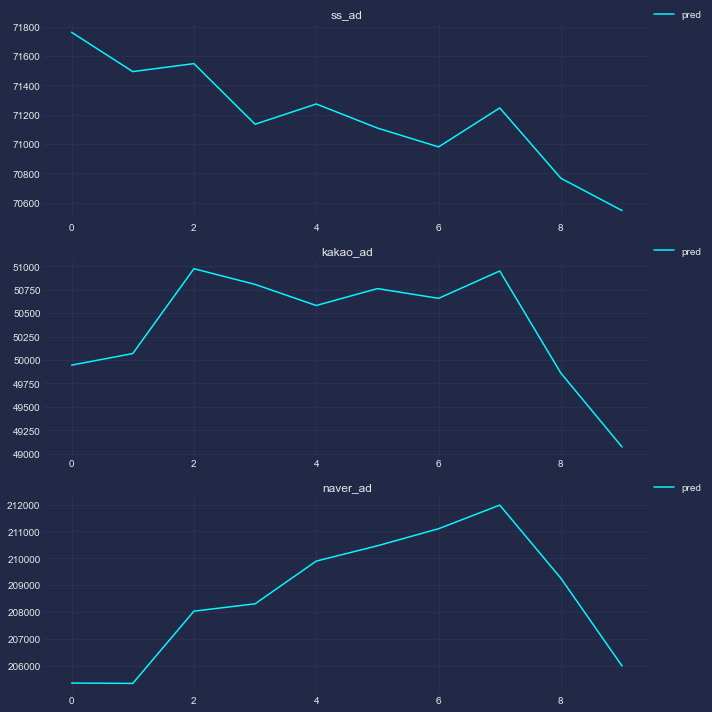

In [128]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

draw_subplot(axes, 0, 'ss_ad')
draw_subplot(axes, 1, 'kakao_ad')
draw_subplot(axes, 2, 'naver_ad')

plt.tight_layout()
plt.show()
